STEP1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

STEP2: LOAD DATASET

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


STEP3: BASIC EXPLORATION

In [3]:
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

STEP4: DATA CLEANING

In [4]:
df.drop_duplicates(inplace=True)
df=df.copy()
df = df.fillna({'country': 'Unknown', 'rating': 'Unknown', 'date_added': 'Unknown'})


STEP5:Exploratory Data Analysis

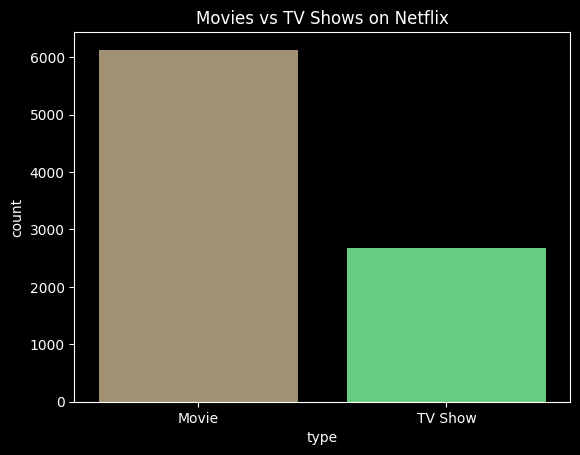

In [5]:
plt.style.use('dark_background')
sns.countplot(data=df, x='type', hue='type', palette='terrain_r', legend=False)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

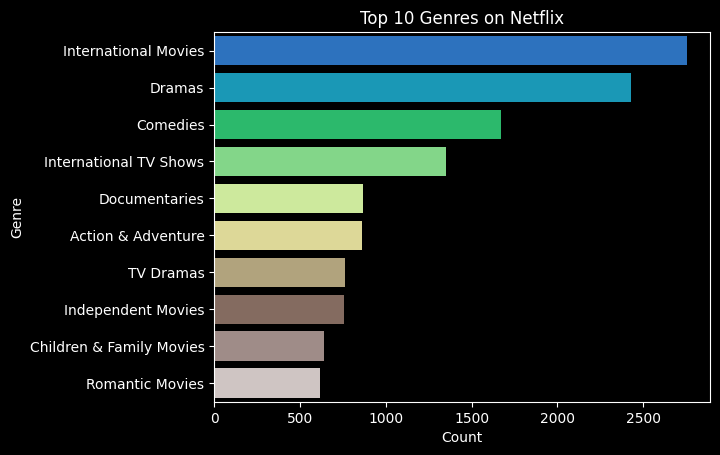

In [6]:
from collections import Counter
genre_list = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
plt.style.use('dark_background')
sns.barplot(data=genres_df, x='Count', y='Genre',hue='Genre',palette='terrain',legend=False)
plt.title("Top 10 Genres on Netflix")
plt.show()


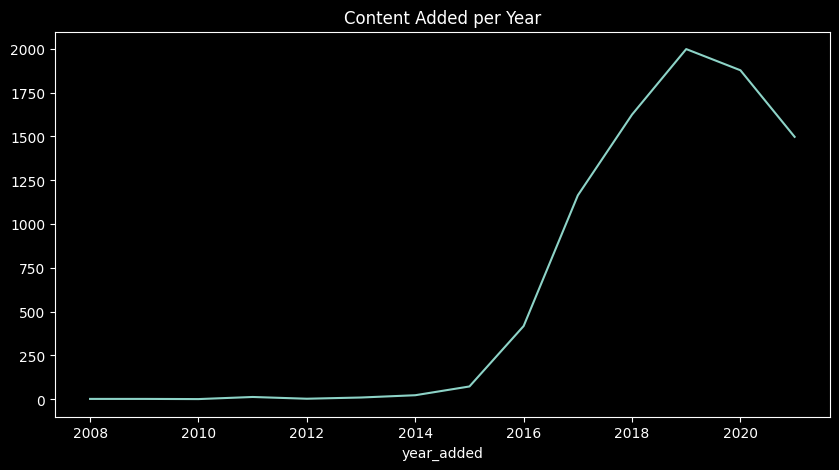

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title("Content Added per Year")
plt.show()


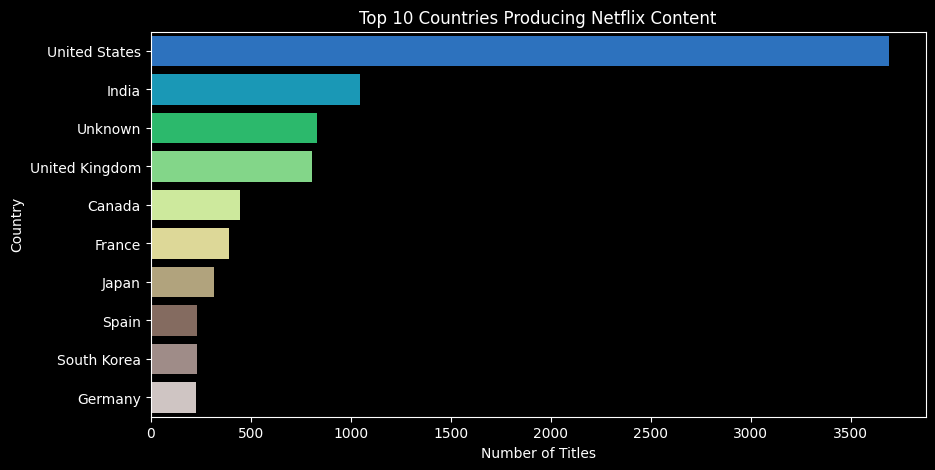

In [8]:
from collections import Counter
country_list = df['country'].dropna().apply(lambda x: x.split(', '))
all_countries = [country for sublist in country_list for country in sublist]
country_counts = Counter(all_countries).most_common(10)
countries_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])
plt.figure(figsize=(10,5))
sns.barplot(data=countries_df, x='Count', y='Country',hue='Country',palette='terrain')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


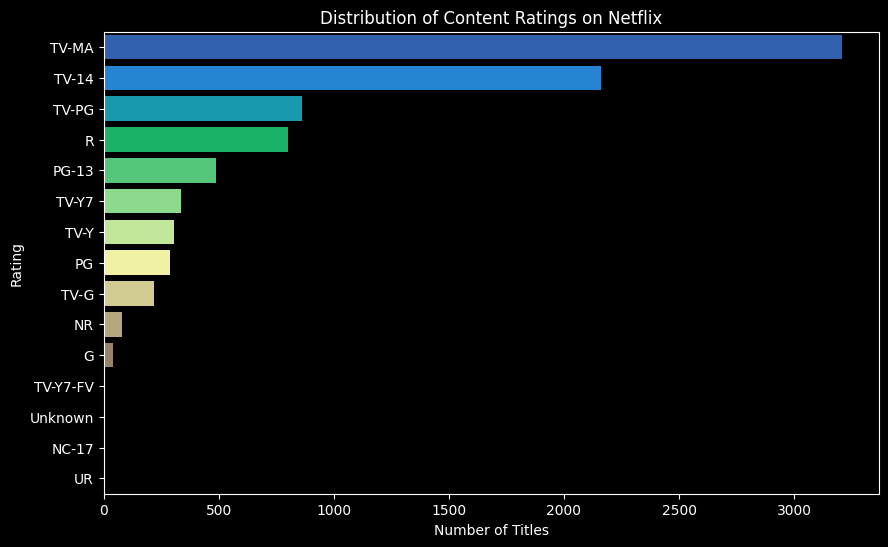

In [9]:
df = df[~df['rating'].str.contains('min', na=False)]
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(data=rating_counts, x='Count', y='Rating',hue='Rating',palette='terrain')
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


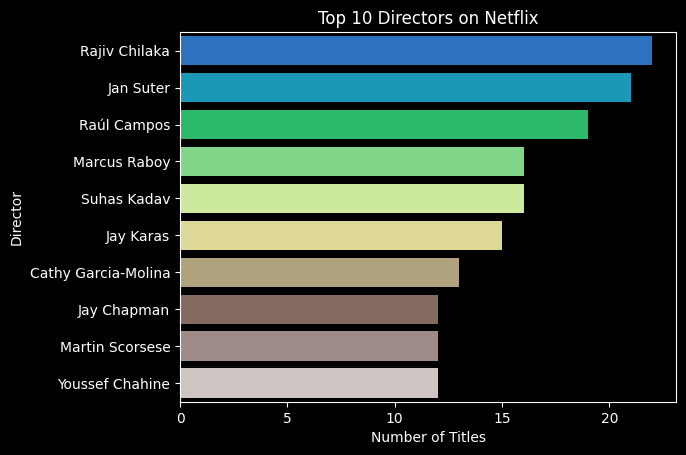

In [10]:
top_directors = (df['director']
                 .dropna()
                 .apply(lambda x: x.split(', '))
                 .explode()
                 .value_counts()
                 .head(10)
                 .reset_index())
top_directors.columns = ['Director', 'Count']
sns.barplot(data=top_directors, x='Count', y='Director',hue='Director',palette='terrain')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


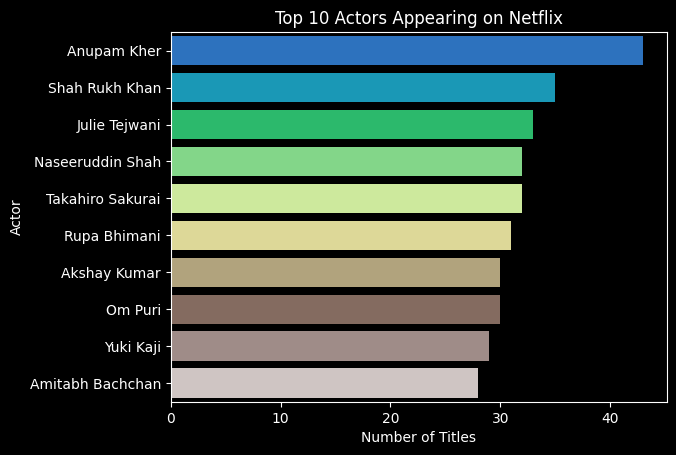

In [11]:
top_actors = (df['cast']
              .dropna()
              .apply(lambda x: x.split(', '))
              .explode()
              .value_counts()
              .head(10)
              .reset_index())
top_actors.columns = ['Actor', 'Count']
plt.style.use('dark_background')
sns.barplot(data=top_actors, x='Count', y='Actor',hue='Actor',palette='terrain')
plt.title("Top 10 Actors Appearing on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


In [12]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
movies = movies.copy()
tv_shows = tv_shows.copy()
movies['duration_int'] = movies['duration'].str.replace(' min', '').astype(float)
tv_shows['duration_int'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)



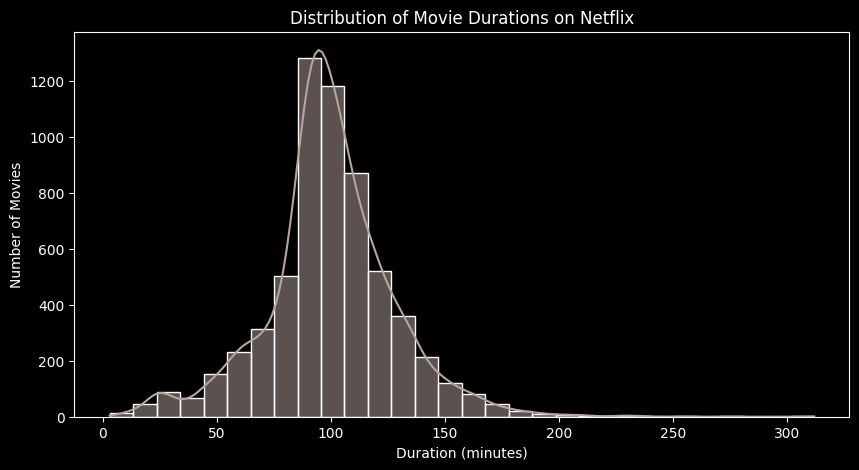

In [13]:
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
sns.set_palette('terrain_r')
sns.histplot(movies['duration_int'], bins=30, kde=True)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


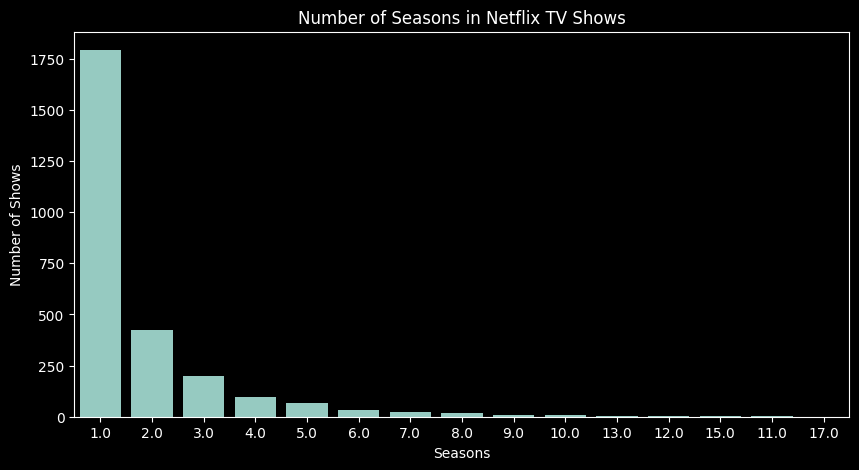

In [14]:
plt.figure(figsize=(10,5))
plt.style.use('dark_background')
sns.countplot(x='duration_int', data=tv_shows, order=tv_shows['duration_int'].value_counts().index)
plt.title("Number of Seasons in Netflix TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Number of Shows")
plt.show()


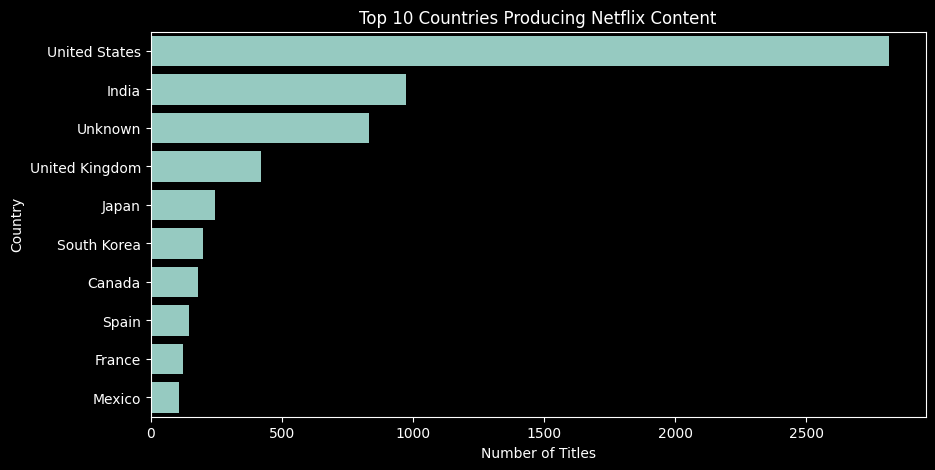

In [15]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


<Axes: xlabel='type', ylabel='rating'>

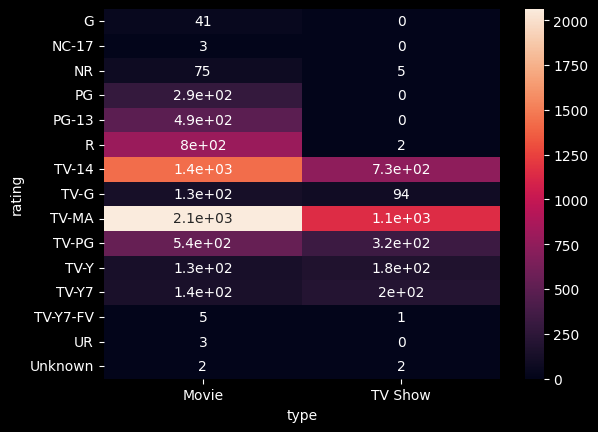

In [16]:
df = df[~df['rating'].str.contains('min', na=False)]
genre_rating = df.groupby(['rating'])['listed_in'].count().sort_values(ascending=False)
sns.heatmap(df.pivot_table(index='rating', columns='type', values='show_id', aggfunc='count', fill_value=0), annot=True)
